In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
csv_path = r'D:\dataset\final sheet - Copy.csv'
dataset = pd.read_csv(csv_path)

In [6]:
input_data = dataset.drop(columns = ["UCS"])
output_data = dataset['UCS']
from sklearn.preprocessing import minmax_scale
X =  minmax_scale(input_data, feature_range=(0,1))
Y = minmax_scale(output_data, feature_range=(0,1))

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [8]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=10, n_estimators= 100,random_state=0)
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [9]:
y_pred = regr.predict(X_test)

In [10]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.035683145980040507
Mean Squared Error: 0.0029791360266396534
Root Mean Squared Error: 0.05458146229847322


In [11]:
from sklearn.metrics import r2_score
print('correlation fatcor',r2_score(y_test, y_pred))

correlation fatcor 0.927652424451226


Feature: 0, Score: 0.06474
Feature: 1, Score: 0.11448
Feature: 2, Score: 0.05009
Feature: 3, Score: 0.05793
Feature: 4, Score: 0.07163
Feature: 5, Score: 0.01563
Feature: 6, Score: 0.29580
Feature: 7, Score: 0.01399
Feature: 8, Score: 0.03309
Feature: 9, Score: 0.13543
Feature: 10, Score: 0.01915
Feature: 11, Score: 0.12802


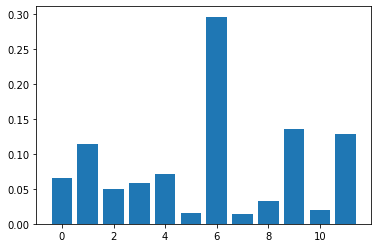

In [12]:
importance = regr.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()